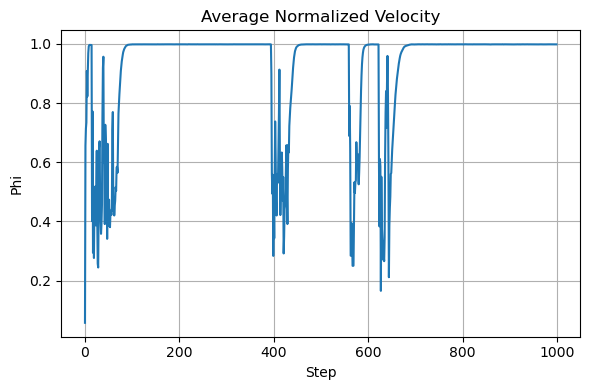

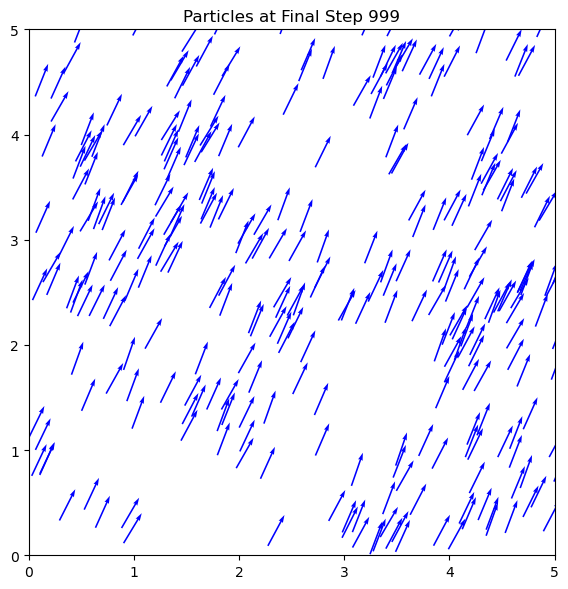

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ========== 参数部分 ==========
L = 5  # 系统边长
SPEED = 0.03  # 速度大小
TOT_particles = 300
csv_file = "particles.csv"

# ========== 读取数据 ==========
df = pd.read_csv(csv_file)

# 获取总的步数
max_step = df['step'].max()

# ========== 一、计算平均归一化速度 ==========
order_param = []

for step in range(max_step + 1):
    data = df[df['step'] == step]
    vx = np.cos(data["theta"].values)
    vy = np.sin(data["theta"].values)
    Vx = np.sum(vx)
    Vy = np.sum(vy)
    v_avg = np.sqrt(Vx**2 + Vy**2) / (TOT_particles)
    order_param.append(v_avg)

# ========== 可视化序参量 ==========
plt.figure(figsize=(6,4))
plt.plot(range(max_step + 1), order_param, label="Order Parameter")
plt.xlabel("Step")
plt.ylabel("Phi")
plt.title("Average Normalized Velocity")
plt.grid(True)
plt.tight_layout()
#plt.savefig("order_parameter.png")
plt.show()

# ========== 二、绘制最后一帧的粒子朝向图 ==========
last_frame = df[df['step'] == max_step]
plt.figure(figsize=(6,6))
plt.quiver(last_frame['x'], last_frame['y'],
           np.cos(last_frame['theta']), np.sin(last_frame['theta']),
           angles='xy', scale_units='xy', scale=3, color='blue', width=0.003)
plt.xlim(0, L)
plt.ylim(0, L)
plt.gca().set_aspect('equal')
plt.title(f"Particles at Final Step {max_step}")
plt.tight_layout()
#plt.savefig("final_frame.png")
plt.show()

# ========== 三、生成动图 ==========
fig, ax = plt.subplots(figsize=(6,6))
quiver = ax.quiver([], [], [], [], scale=3, scale_units='xy', width=0.003)

def init():
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect('equal')
    return quiver,

def update(frame):
    ax.clear()
    data = df[df['step'] == frame]
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title(f"Step {frame}")
    return ax.quiver(data['x'], data['y'],
                     np.cos(data['theta']), np.sin(data['theta']),
                     scale=5, scale_units='xy', width=0.003),

ani = animation.FuncAnimation(fig, update, frames=range(max_step + 1),
                              init_func=init, blit=False, interval=50)

# 保存为 MP4 或 GIF
ani.save("particles_dynamics.gif", writer="pillow")

plt.close()


